In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from test_abs import *

cuda
Loaded util functions


# Load learned reference and test images for MNIST

In [2]:
u_path = './trained_u/u_mnist.npy'
u = np.load(u_path)
_, x_test = load_MNIST(32)
n_test = 1000
x_test = x_test[:n_test]
print(x_test.shape)

n_steps = 50
n_batch = 256
alpha = 1

Loaded MNIST dataset: x_train(50000, 32, 32), x_valid(10000, 32, 32)
(1000, 32, 32)


# Define some transformations

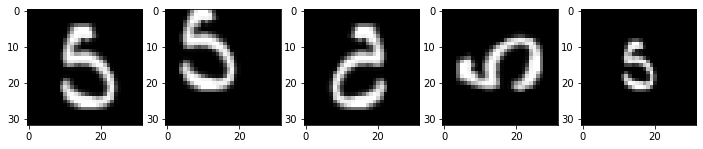

In [3]:
def roll(x,m=5,n=5):
    x = np.roll(x,m,axis=0)
    x = np.roll(x,n,axis=1)
    return x

def shift(x,m=5,n=5):
# up left
    y = np.zeros_like(x)
    y[:-m,:-n] = x[m:,n:]
    return y

def flip(x,ax=1):
    x = np.flip(x, axis = ax)
    return x

def rotate(x,k=1): 
    # k is the number of flip times
    x = np.rot90(x, k, axes=(0, 1))
    return x

import cv2
def zoom(x,k=0.5):
    # k is the factor
    m0,n0 = x.shape
    m,n = int(m0*k),int(n0*k)
    top = abs((m0-m)//2)
    left = abs((n0-n)//2)
    if k < 1:
        x_zoom = np.zeros_like(x)
        x_zoom[top:top+m,left:left+n] = cv2.resize(x,(m,n))
    else:
        x_zoom = cv2.resize(x,(m,n))[top:top+m0,left:left+n0]
    return x_zoom


x = x_test[17]
plt.figure(figsize=(12,3))
plt.gray()
plt.subplot(151)
plt.imshow(x)
plt.subplot(152)
x_shift = shift(x)
plt.imshow(x_shift)
plt.subplot(153)
x_flip = flip(x)
plt.imshow(x_flip)
plt.subplot(154)
x_rot = rotate(x)
plt.imshow(x_rot)
plt.subplot(155)
x_zoom = zoom(x,0.6)
plt.imshow(x_zoom)
plt.show()

# Test on transformed images

100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


mse 0.00
psnr 69.92
ssim 1.00
mean mse 0.00
psnr of mean 37.29
psnr of mean (mean of psnr) 37.29(69.92)


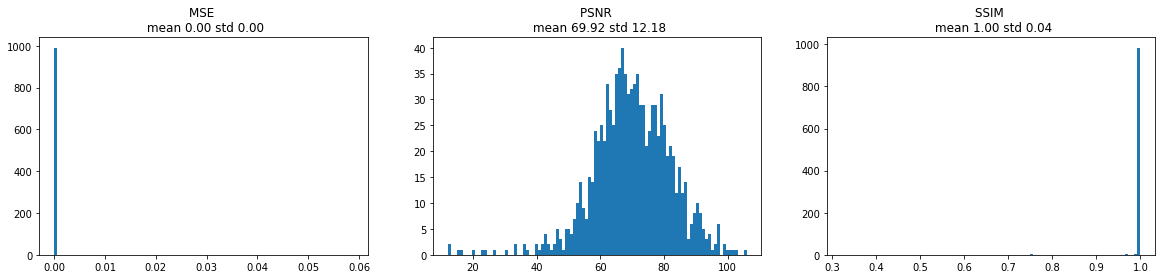

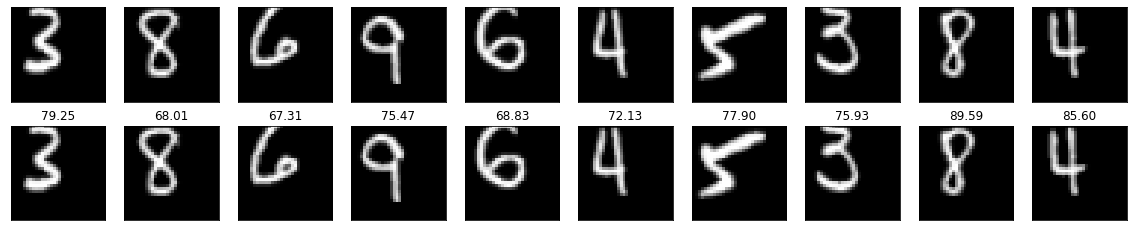

In [4]:
x_test_new = np.array([shift(x,5,5) for x in x_test])

x_test_rec,mse_list,psnr_list,ssim_list = test_abs(n_test,n_batch,n_steps,alpha,u,x_test_new)
plot_test(x_test_rec,x_test_new,mse_list,psnr_list,ssim_list,n_test,10)

100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


mse 0.00
psnr 63.81
ssim 0.99
mean mse 0.00
psnr of mean 32.26
psnr of mean (mean of psnr) 32.26(63.81)


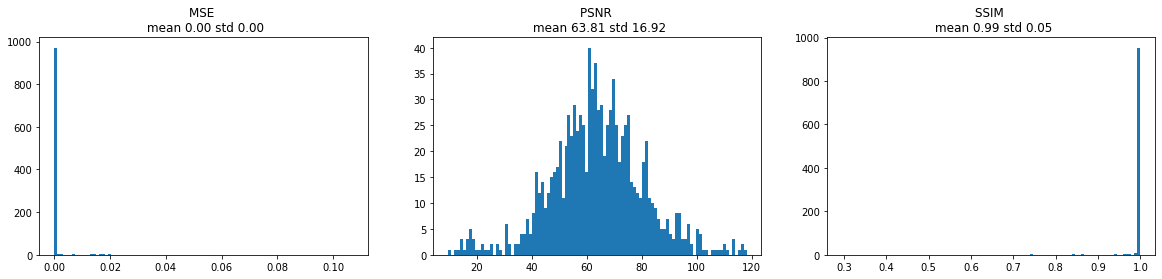

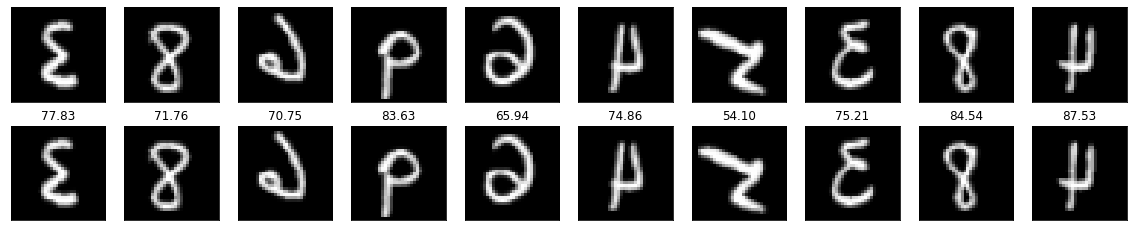

In [6]:
x_test_new = np.array([flip(x,1) for x in x_test])

x_test_rec,mse_list,psnr_list,ssim_list = test_abs(n_test,n_batch,n_steps,alpha,u,x_test_new)
plot_test(x_test_rec,x_test_new,mse_list,psnr_list,ssim_list,n_test,10)

100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


mse 0.00
psnr 57.81
ssim 0.98
mean mse 0.00
psnr of mean 28.30
psnr of mean (mean of psnr) 28.30(57.81)


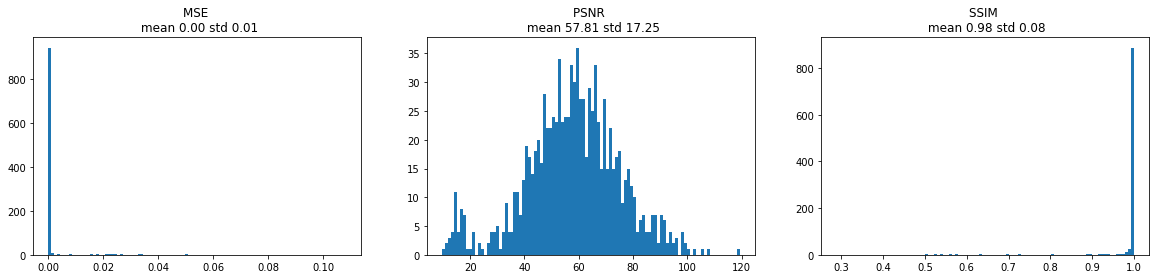

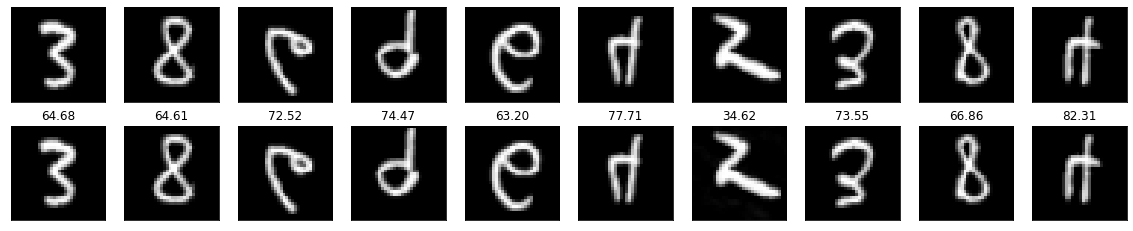

In [7]:
x_test_new = np.array([flip(x,0) for x in x_test])

x_test_rec,mse_list,psnr_list,ssim_list = test_abs(n_test,n_batch,n_steps,alpha,u,x_test_new)
plot_test(x_test_rec,x_test_new,mse_list,psnr_list,ssim_list,n_test,10)